In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
pd.set_option('display.max_columns', 0,        #set  ให้ show col ทั้งหมดเเละข้อมูลใน col
              'display.max_colwidth', 0)

In [9]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/FIFA2018/PlayerPersonalData.csv'
df = pd.read_csv( url )
df.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/players/10/16/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/players/10/16/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/players/10/16/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,3,176580,L. Suárez,30,https://cdn.sofifa.org/players/10/16/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,4,4,167495,M. Neuer,31,https://cdn.sofifa.org/players/10/16/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493


In [11]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Name', 'Age', 'Photo',
       'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo',
       'Value', 'Wage', 'Special'],
      dtype='object')

In [15]:
df.drop(columns= [ 'Unnamed: 0', 'Unnamed: 0.1',  'Photo' , 'Flag', 'Club Logo' ] , inplace = True)


KeyError: "['Unnamed: 0' 'Unnamed: 0.1' 'Photo' 'Flag' 'Club Logo'] not found in axis"

In [17]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493


In [19]:
df.rename(columns={ 'Wage' : 'Wage_EUR' , 'Value' : 'Value_EUR' } , inplace= True)

In [20]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493


In [25]:
df['Value_EUR'].str[-1 : ]    #ดูเเค่ตัวสุดท้าย

0        M
1        M
2        M
3        M
4        M
        ..
17976    K
17977    0
17978    K
17979    K
17980    K
Name: Value_EUR, Length: 17981, dtype: object

In [27]:
df['Value_EUR'].str[-1 : ].unique()    #ดูว่ามีอะะไรบ้าง

array(['M', '0', 'K'], dtype=object)

In [29]:
def value_unit(s : str) :
    s=s.strip().upper()   #ใส่ค่าเข้ามาจะได้ไม่มีปัญหาตัวเล็กตัวใหญ่
    if s[-1] == 'M':
        return 1e6
    elif s[-1] == 'K':
        return 1000
    else :
        return 1

In [31]:
value_unit('50k')

1000

In [32]:
import re
def str_value(s : str):
    mul = value_unit(s)
    return float(re.sub(r'[^0-9.]' , ' ' , s )) *mul     #เอาเฉพราะตัวเลข

In [34]:
str_value('50m')

50000000.0

In [38]:
df[ ['Value_EUR' , 'Wage_EUR']] = df[ ['Value_EUR' , 'Wage_EUR']].applymap( lambda s : str_value(s))
#applymap จะทำงานกับทุกตัวที่อยู่ใน col ,  lambda s : str_value(s)  ทุกตัว s ทุกตัวที่อยู่ใน col โยนเข้า str_value(s

In [40]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1493


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           17981 non-null  int64  
 1   Name         17981 non-null  object 
 2   Age          17981 non-null  int64  
 3   Nationality  17981 non-null  object 
 4   Overall      17981 non-null  int64  
 5   Potential    17981 non-null  int64  
 6   Club         17733 non-null  object 
 7   Value_EUR    17981 non-null  float64
 8   Wage_EUR     17981 non-null  float64
 9   Special      17981 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.4+ MB


In [43]:
df.sort_values('Value_EUR' ,  ascending=False).head()   #เรียงจากน้อยไปมาก

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228
5,188545,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,2143


In [46]:
df.groupby('Club').sum()[ ['Value_EUR', 'Wage_EUR' ] ].sort_values('Value_EUR' ,  ascending=False).head()
    # คลับให้ค่าตัวเเพงที่สุด

,Value_EUR,Wage_EUR
Club,,
Real Madrid CF,826700000.0,4751000.0
FC Bayern Munich,748825000.0,3273000.0
FC Barcelona,744500000.0,4792000.0
Chelsea,673085000.0,3537000.0
Paris Saint-Germain,631750000.0,2198000.0


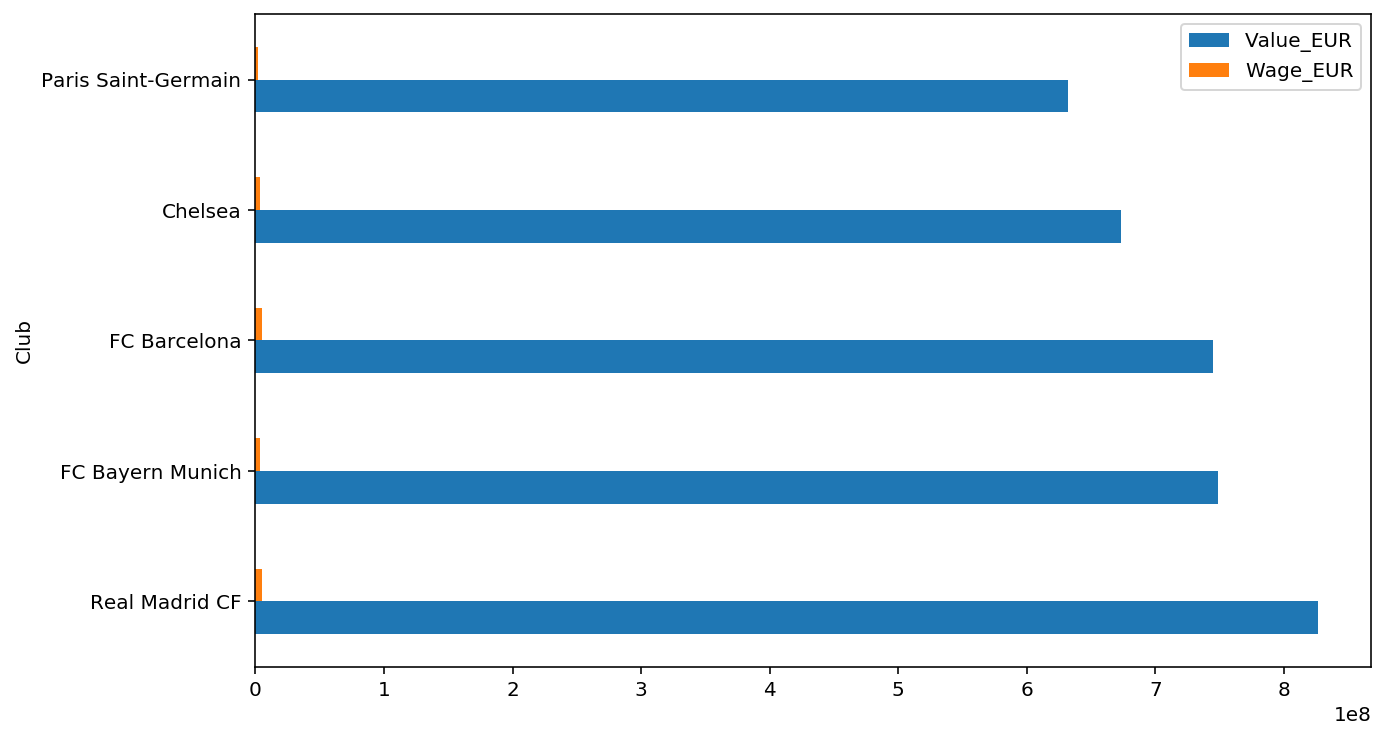

In [51]:
fig, ax=plt.subplots( figsize=(10,6) )
df.groupby('Club').sum()[ ['Value_EUR', 'Wage_EUR' ] ].sort_values('Value_EUR' ,  ascending=False).head().plot(kind = 'barh', ax=ax)
